## 텐서플로를 통한 자동차 연비 예측하기
* 참고 : [자동차 연비 예측하기: 회귀  |  TensorFlow Core](https://www.tensorflow.org/tutorials/keras/regression)

## 필요 도구 가져오기

In [1]:
# 데이터 분석을 위한 pandas
# 데이터 시각화를 위한 seaborn을 불러옵니다.
import pandas as pd
import seaborn as sns

In [2]:
# 사용하는 버전
print(pd.__version__)
print(sns.__version__)

1.0.4
0.11.0


## 데이터셋 로드

In [3]:
# 데이터셋을 불러옵니다.
df = sns.load_dataset("mpg")
df.shape

(398, 9)

## 결측치 확인

In [4]:
# 결측치 수를 확인합니다.
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [5]:
# 결측치를 제거합니다.
df = df.dropna()
df.shape

(392, 9)

## 수치 데이터만 가져오기

In [6]:
# 문자열 데이터는 별도의 수치데이터로 변환이 필요합니다.
# 여기에서는 숫자 데이터만 사용합니다.
df = df.select_dtypes(exclude="object")
df.shape

(392, 7)

## 전체 데이터에 대한 기초 통계 확인

In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## 데이터셋 나누기

In [8]:
# 전체 데이터프레임에서 df, train, test를 분리합니다.
# train_dataset : 학습에 사용 (예: 기출문제)
# test_dataset : 실제 예측에 사용 (예 : 실전문제)
# 기출문제로 공부하고 실전 시험을 보는 과정과 유사합니다.

train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

train_dataset.shape, test_dataset.shape

((314, 7), (78, 7))

In [9]:
# train_dataset, test_dataset 에서 label(정답) 값을 꺼내 label 을 따로 생성합니다.
# 문제에서 정답을 분리하는 과정입니다.
# train_labels : train_dataset(예: 기출문제) 에서 정답을 꺼내서 분리합니다.
# test_labels : test_labels(예: 실전문제) 에서 정답을 꺼내서 분리합니다.

train_labels = train_dataset.pop('mpg')
test_labels = test_dataset.pop('mpg')

train_labels.shape, test_labels.shape

((314,), (78,))

## 딥러닝 모델 만들기

* 두 개의 완전 연결(densely connected) 은닉층으로 Sequential 모델을 만들겠습니다. 
* 출력 층은 하나의 연속적인 값을 반환합니다. 

In [10]:
import tensorflow as tf
 
tf.random.set_seed(42)

### 딥러닝 층 구성

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

### 모델 컴파일

In [12]:
model.compile(loss='mse',
              metrics=['mae', 'mse'])

### 만든 모델 확인하기

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


## 딥러닝 모델로 학습하기

In [14]:
model.fit(train_dataset, train_labels, epochs=100, verbose=0)

## 딥러닝 모델로 평가하기

In [15]:
model.evaluate(test_dataset, test_labels)

3/3 [==============================] - 0s 1ms/step - loss: 2085.8164 - mae: 44.5092 - mse: 2085.8164


[2085.81640625, 44.50921630859375, 2085.81640625]

## 딥러닝 모델의 예측하기

In [16]:
predict_labels = model.predict(test_dataset).flatten()
predict_labels[:5]

array([-50.74234 , -51.592545, -45.96826 , -11.374146, -25.241282],
      dtype=float32)

## 딥러닝 모델의 예측결과 평가하기

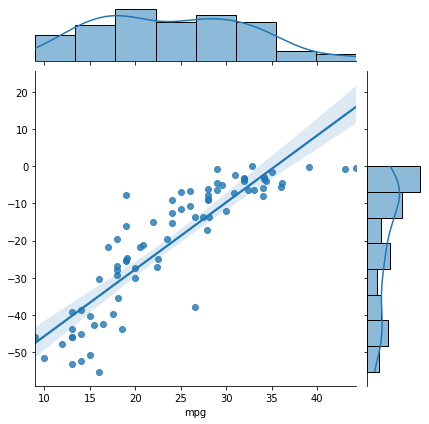

In [17]:
sns.jointplot(x=test_labels, y=predict_labels, kind="reg")